In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import pytesseract
from openpyxl import Workbook
import openpyxl
import tkinter as tk
from tkinter import filedialog


In [10]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [12]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    #ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()





In [13]:
def browse_images():
    # Open file dialog to select images
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_paths = filedialog.askopenfilenames(title="Select Image Files", filetypes=[("Image files", "*.jpg;*.png")])
    root.destroy()  # Destroy the Tkinter window after selection

    return file_paths

In [15]:
import tkinter as tk
from tkinter import filedialog

def browse_images():
    # Create a Tkinter window
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # Open file dialog to select image files
    file_paths = filedialog.askopenfilenames(
        title="Select Image Files",
        filetypes=[("JPEG files", "*.jpg"), ("PNG files", "*.png")]
    )

    root.destroy()  # Destroy the Tkinter window after selection

    # Filter only JPEG images
    jpeg_images = [path for path in file_paths if path.lower().endswith(('.jpg', '.jpeg'))]

    return jpeg_images

# Test the browse_images function
image_paths = browse_images()
print("Selected Image Paths:", image_paths)


Selected Image Paths: ['/Users/karan/Downloads/dataset/Dataset/Dataset/Original/j_005.jpg']


In [16]:
import cv2

# Iterate through selected image files
for image_path in image_paths:
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is not None:
        # Perform further processing on the image
        # For example, convert to grayscale, perform OCR, etc.
        pass
    else:
        print(f"Failed to load image: {image_path}")


In [54]:
# while True:
#     # Ask user for image input
#     image_path = input("Enter the path to the image (or type 'quit' to exit): ")

#     # Check if the user wants to quit
#     if image_path.lower() == 'quit':
#         break

Enter the path to the image (or type 'quit' to exit): /Users/karan/Downloads/dataset/Dataset/Dataset/Original/j_005.jpg
Enter the path to the image (or type 'quit' to exit): quit


In [17]:
new_folder_path = "/Users/karan/Desktop/newFolder/"


In [22]:
filename = "gray_image.jpg"

In [23]:
full_path = new_folder_path + filename

In [24]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
cv2.imwrite(full_path, gray)

True

In [26]:
print("Grayscale image saved to:", full_path)

Grayscale image saved to: /Users/karan/Desktop/newFolder/gray_image.jpg


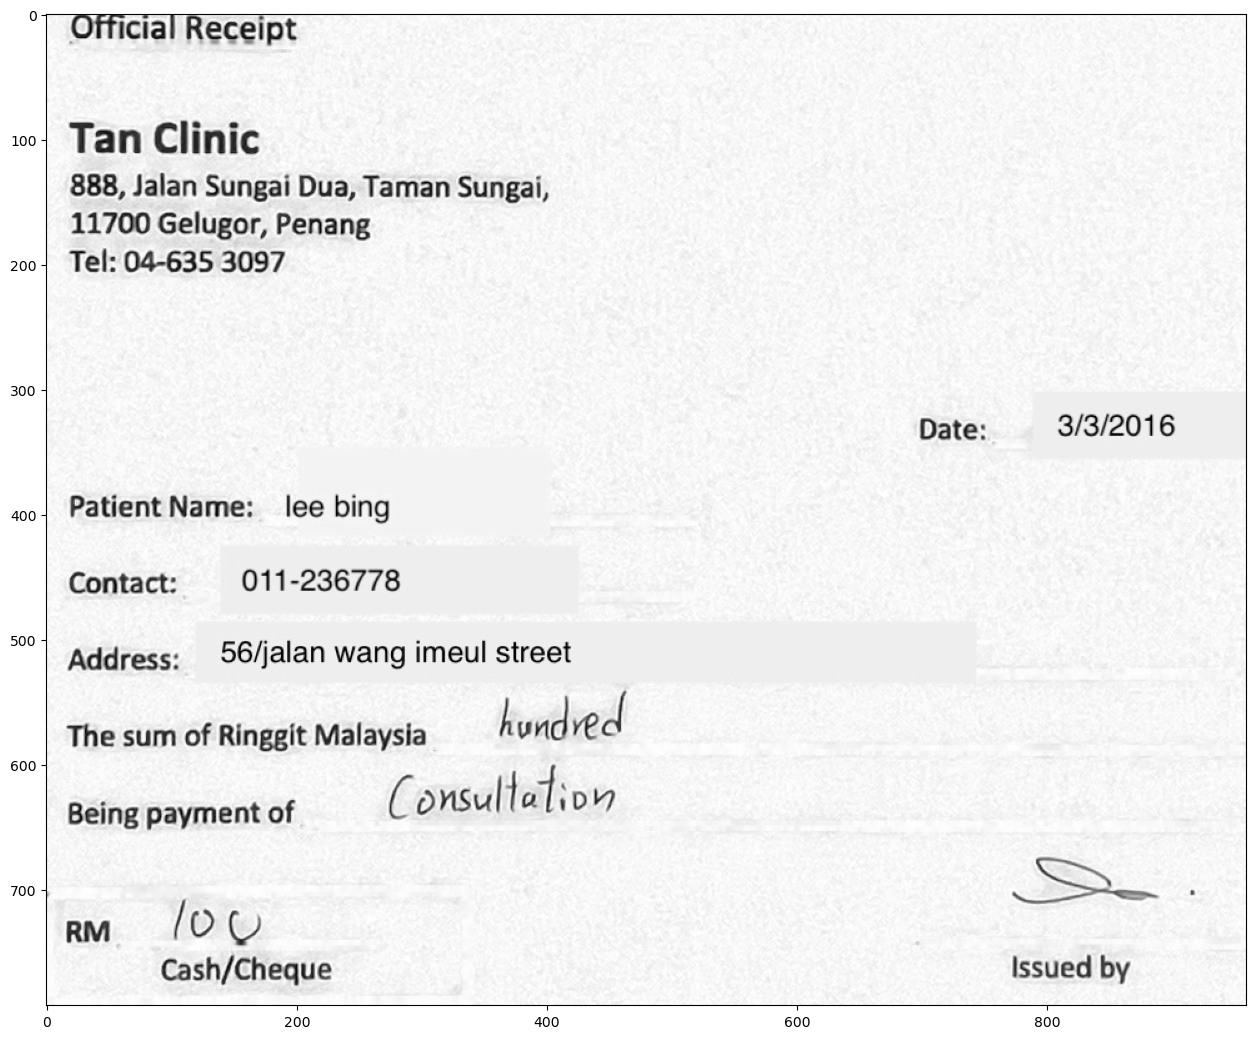

In [27]:
display("/Users/karan/Desktop/newFolder/gray_image.jpg")

In [28]:
blur=cv2.GaussianBlur(gray,(7,7),0)

In [29]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [30]:
thresh_folder = "/Users/karan/Desktop/thresh/"

In [31]:
os.makedirs(thresh_folder, exist_ok=True)

In [32]:
thresh_filename = "thresh.jpg"

In [33]:
thresh_full_path = os.path.join(thresh_folder, thresh_filename)


In [34]:
cv2.imwrite(thresh_full_path, thresh)

True

In [35]:
# dilate = cv2.dilate(thresh, kernal, iterations=1)

NameError: name 'kernal' is not defined

In [37]:
import cv2

# Define the kernel for dilation (replace 'kernel_size' with the desired size)
kernel_size = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Perform dilation using the defined kernel
dilate = cv2.dilate(thresh, kernel, iterations=1)


In [38]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cents[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])


In [39]:
contour_folder = "/Users/karan/Desktop/contour"


In [40]:
os.makedirs(contour_folder, exist_ok=True)


In [41]:
contour_filename = "contour.jpg"

In [42]:
contour_full_path = os.path.join(contour_folder, contour_filename)


In [43]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    #if h > 200 and w > 20:
    #    roi = image[y:y+h, x:x+h]
    cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
        #ocr_result = pytesseract.image_to_string(roi)
        #ocr_result = ocr_result.split("\n")
        #for item in ocr_result:
        #    results.append(item)


In [44]:
cv2.imwrite(contour_full_path, image)


True

In [45]:
print("Image with contours saved to:", contour_full_path)

Image with contours saved to: /Users/karan/Desktop/contour/contour.jpg


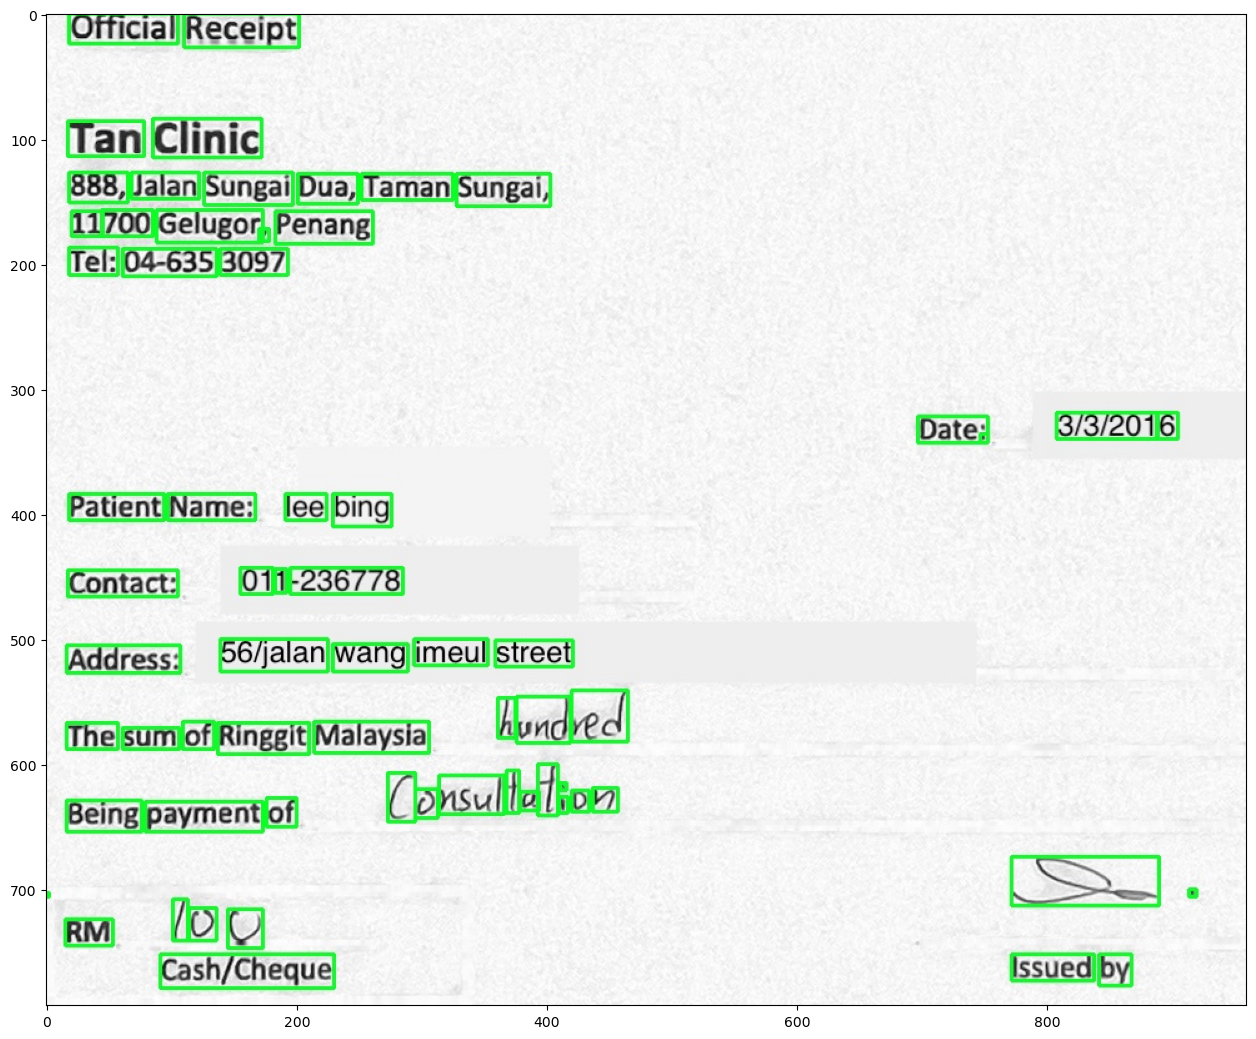

In [46]:
display(contour_full_path)

In [47]:

base_img=gray

In [48]:
data=pytesseract.image_to_string(base_img)

In [49]:
print(data)

Official Receipt

Tan Clinic

888, Jalan Sungai Dua, Taman Sungai,
11700 Gelugor, Penang

Tel: 04-635 3097

Date: 3/3/2016
Patient Name: lee bing
Contact: 011-236778
Address; 56/jalan wang imeul street
The sum of Ringgit Malaysia hundred

Being payment of Consultation

SS
RM lou

Cash/Cheque Issued by



In [50]:
data = data.split("\n")

In [84]:
print(data)

['Official Receipt', '', 'Tan Clinic', '', '888, Jalan Sungai Dua, Taman Sungai,', '11700 Gelugor, Penang', '', 'Tel: 04-635 3097', '', 'Date: 3/3/2016', 'Patient Name: lee bing', 'Contact: 011-236778', 'Address: 56/jalan wang imeul street', 'The sum of Ringgit Malaysia hundred', '', 'Being payment of Consultation', '', 'SS', 'RM lou', '', 'Cash/Cheque Issued by', '']


In [85]:
#data = ['Orticial Receipt', '', 'Tan Clinic', '', '888, Jalan Sungai Dua, Taman Sungai,', '11700 Gelugor, Penang', '', 'Tel: 04-635 3097', '', 'Date:_ 5-4-3020 _', 'Patient Name: Zaiton Isha', 'Contact: 011-1879801', 'Address:1, Jolan Rakr, Rent Pardaagangan Bakr, 34000 Muar, Johar.', '', 'The sur of Ringgit Malaysia 4thoen', '', 'Being payment of _medicire', '', 'i ae) a', 'Cash/Cheque', '', 'Issued by', '', '']

# Initialize variables to store extracted information
patient_name = None
contact = None
address = None
date = None

# Iterate through the list and extract information
for item in data:
    if 'Patient Name:' in item:
        patient_name = item.split(':')[-1].strip()
    elif 'Contact:' in item:
        contact = item.split(':')[-1].strip()
    elif 'Address:' in item:
        address = item.split(':')[-1].strip()
    elif 'Date:' in item:
        date = item.split(':')[1].strip()

# Print the extracted information
print("Patient Name:", patient_name)
print("Contact:", contact)
print("Address:", address)
print("Date:", date)


Patient Name: lee bing
Contact: 011-236778
Address: 56/jalan wang imeul street
Date: 3/3/2016


In [88]:
import os
import openpyxl
from openpyxl import Workbook

# Specify the folder path for saving the Excel file
excel_folder = "/Users/karan/Desktop/excel"

# Create the folder if it doesn't exist
os.makedirs(excel_folder, exist_ok=True)

# Specify the filename for the Excel file
excel_filename = "Book1.xlsx"

# Combine the folder path and filename to create the full path
excel_full_path = os.path.join(excel_folder, excel_filename)

# Create a new workbook if the file doesn't exist, otherwise load the existing workbook
try:
    book = openpyxl.load_workbook(excel_full_path)
except FileNotFoundError:
    book = Workbook()

# Select the active sheet (create a new one if it doesn't exist)
sheet = book.active

# Rows and columns are 1 indexed (since Excel uses 1 indexing)
row = sheet.max_row + 1  # Get the next available row

# Your data
content = [patient_name, contact, address, date]

# Write the data to the sheet
for column, item in enumerate(content, start=1):
    sheet.cell(row=row, column=column, value=item)

# Save the workbook in the specified folder
book.save(excel_full_path)

print("Excel file saved to:", excel_full_path)


Excel file saved to: /Users/karan/Desktop/excel/Book1.xlsx


ModuleNotFoundError: No module named 'project'